# **보험 관심고객 예측**
---


## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 보험 관심고객 예측
```  

> **프로젝트유형**

```
▶ 보험 데이터 활용 Classification(분류)

```



## **문제상황 Introduction**
---

> **문제정의**

```
▶ 신규 가입자 증가량 감소
```  

> **기대효과**

```
▶ 보험상품에 관심을 보이는 고객 대상 효율적인 마케팅 진행
```

> **해결방안**

```
▶ 데이터 EDA 및 Classification으로 요소별 영향력 탐색 및 모델링
```


> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|id|ID|
|Gender|성별|
|Age|나이|
|Driving_License|운전 면허|
|Region_Code|지역 코드|
|Previously_Insured|이전에 보험 가입 여부|
|Vehicle_Age|차량 연령|
|Vehicle_Damage|차량 손상|
|Annual_Premium|연간 보험료|
|Policy_Sales_Channel|판매 채널|
|Vintage|회사와의 연관 지속 기간(일)|
|Response|응답|




In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/개인 프로젝트/12')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/개인 프로젝트/12'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT12_DATA.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Process01
---
DATA 전처리 및 EDA

### DATA 전처리 및 EDA


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Age2'] = df['Age']//10*10
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age2
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,70
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,40
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,20
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,20


In [ ]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
df.Vehicle_Damage.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.Response.mean()

0.12256336113815208

## Process02
---

### 항목별 응답률 시각화

<Axes: xlabel='Previously_Insured', ylabel='Response'>

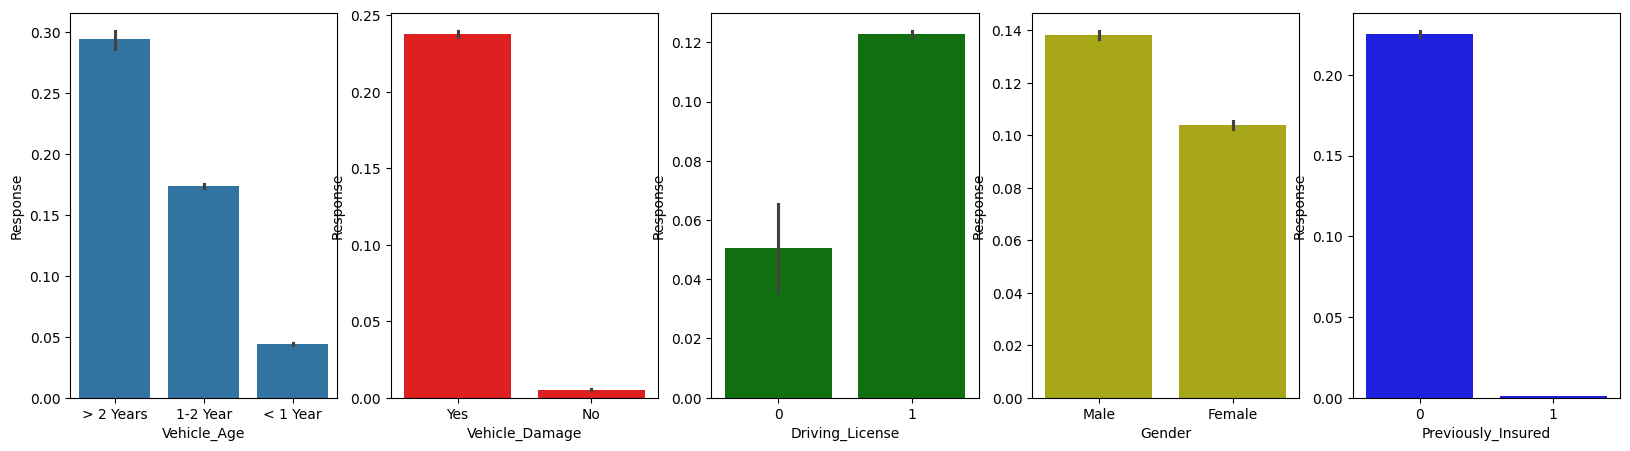

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(151)
sns.barplot(df, x='Vehicle_Age', y='Response')

plt.subplot(152)
sns.barplot(df, x='Vehicle_Damage', y='Response', color='r')

plt.subplot(153)
sns.barplot(df, x='Driving_License', y='Response', color='g')

plt.subplot(154)
sns.barplot(df, x='Gender', y='Response', color='y')

plt.subplot(155)
sns.barplot(df, x='Previously_Insured', y='Response', color='b')

<Axes: xlabel='Age2', ylabel='Response'>

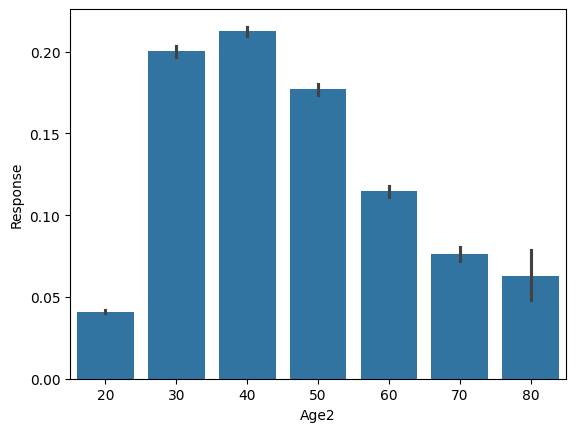

In [ ]:
sns.barplot(df, x='Age2', y='Response')

### Response와 상관관계

In [ ]:
df1 = df[['Age', 'Driving_License','Region_Code', 'Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]

In [ ]:
df.groupby('Response')['Annual_Premium'].mean()

Response
0    30419.160276
1    31604.092742
Name: Annual_Premium, dtype: float64

<Axes: xlabel='Response', ylabel='Annual_Premium'>

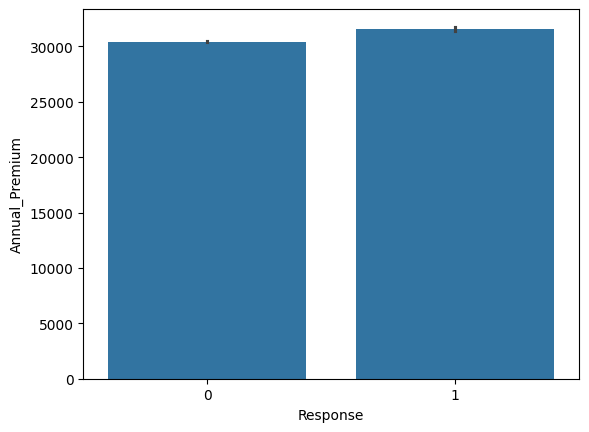

In [ ]:
sns.barplot(df, x='Response', y='Annual_Premium')

In [ ]:
df.groupby('Response')['Vintage'].mean()

Response
0    154.380243
1    154.112246
Name: Vintage, dtype: float64

<Axes: xlabel='Response', ylabel='Vintage'>

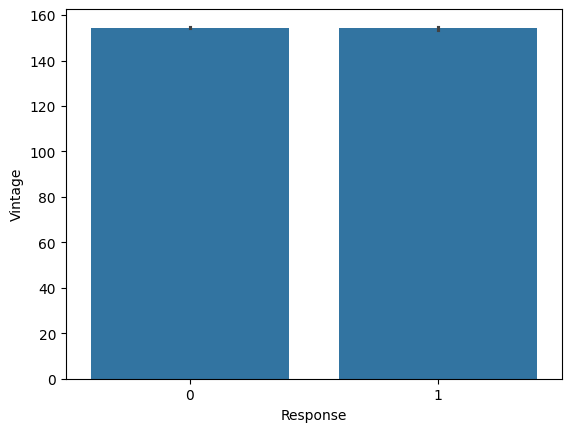

In [ ]:
sns.barplot(df, x='Response', y='Vintage')

## Process03
---

### 모델 준비

In [ ]:
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numeric_list : ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Age2']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Age2', 'Annual_Premium', 'Vintage', 'id', 'Response'], axis=1)
Y=df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(266776, 8)
(266776,)
(114333, 8)
(114333,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Gender
Vehicle_Age
Vehicle_Damage


In [ ]:
x_test[categoical_list].head(5)

,Gender,Vehicle_Age,Vehicle_Damage
274063,0,0,0
216829,0,1,0
256248,1,2,1
191506,0,0,1
192982,0,0,0


### 모델 학습 및 평가

In [ ]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 777)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    234079
           1       0.77      0.31      0.44     32697

    accuracy                           0.90    266776
   macro avg       0.84      0.65      0.69    266776
weighted avg       0.89      0.90      0.89    266776

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    100320
           1       0.34      0.13      0.19     14013

    accuracy                           0.86    114333
   macro avg       0.62      0.55      0.56    114333
weighted avg       0.82      0.86      0.83    114333



In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9283609470414641
roc_score_test : 0.81726869898719


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [None, 5, 10]}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_search.best_params_)
print('Best ROC AUC Score:', grid_search.best_score_)

최적 하이퍼 파라미터: {'max_depth': 10, 'n_estimators': 400}
Best ROC AUC Score: 0.8550146976405916


In [ ]:
rfcf = RandomForestClassifier(random_state = 777, n_estimators= 400, max_depth=10)
rfcf.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    234079
           1       0.77      0.31      0.44     32697

    accuracy                           0.90    266776
   macro avg       0.84      0.65      0.69    266776
weighted avg       0.89      0.90      0.89    266776

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    100320
           1       0.34      0.13      0.19     14013

    accuracy                           0.86    114333
   macro avg       0.62      0.55      0.56    114333
weighted avg       0.82      0.86      0.83    114333



In [ ]:
y_pred_train_proba = rfcf.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfcf.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8619572308666502
roc_score_test : 0.8535524564453764


roc score 기준 과적합 문제 어느정도 해결

In [ ]:
import pickle
with open('classifier_res', 'wb') as res_model:
    pickle.dump(rfcf, res_model)

In [ ]:
df2 = df.drop(['Age2', 'Annual_Premium', 'Vintage', 'id', 'Response'],axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
with open('classifier_res', 'rb') as res_model:
    load_model = pickle.load(res_model)

predict1 = load_model.predict(x_test)
predict2 = load_model.predict(x_train)
test = x_test.copy()
train = x_train.copy()
test['Predict'] = predict1
train['Predict'] = predict2
predict_list = pd.concat([test, train])
final_list = predict_list[predict_list['Predict']==1]
final_list.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Predict
147531,0,35,1,15.0,0,0,0,163.0,1
228947,0,29,1,6.0,0,0,0,163.0,1
334792,0,41,1,46.0,0,0,0,163.0,1
155753,1,20,1,3.0,1,1,1,1.0,1
29059,1,40,1,2.0,1,0,1,163.0,1
379643,0,36,1,28.0,0,0,0,163.0,1
292034,0,34,1,41.0,0,0,0,163.0,1
